In [1]:
include("./Opacity.jl")
include("./utils/Constants.jl")
using PyPlot, LaTeXStrings, .Opacity

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["figure.dpi"]=600
rcParams["mathtext.fontset"] = "stix"
rcParams["font.family"] = "STIXGeneral"
rcParams["font.size"] = 14
rcParams["lines.linewidth"] = 2.5

2.5

In [6]:
num_points = 20

E_nu_space = LinRange(0, 30, num_points)
strong_field_opacities = zeros(num_points)
med_field_opacities = zeros(num_points)
weak_field_opacities = zeros(num_points)
zero_field_opacities = zeros(num_points)

for i in eachindex(strong_field_opacities)
	strong_field_opacities[i] = opacity(NeutronChannel(), (197.3^3 * 0.16 * 0.001), 0.25, E_nu_space[i], pi/2, ELEM_CHARGE*GAUSS_TO_MEV2*1e17, 3; regime=StrongField())
	med_field_opacities[i] = opacity(NeutronChannel(), (197.3^3 * 0.16 * 0.001), 0.25, E_nu_space[i], pi/2, ELEM_CHARGE*GAUSS_TO_MEV2*1e17, 3; regime=MediumField())
	weak_field_opacities[i] = opacity(NeutronChannel(), (197.3^3 * 0.16 * 0.001), 0.25, E_nu_space[i], pi/2, ELEM_CHARGE*GAUSS_TO_MEV2*1e17, 3; regime=WeakFieldOrLowTemperature())
	zero_field_opacities[i] = opacity(NeutronChannel(), (197.3^3 * 0.16 * 0.001), 0.25, E_nu_space[i], pi/2, ELEM_CHARGE*GAUSS_TO_MEV2*1e17, 3; regime=ZeroField())
end

In [4]:
# import raw data from old code
sigma_n_b1e17_t1mev_lowdensity = [7.778990987420739e-45, 3.687426376279251e-44, 1.7570246587074735e-43, 8.058481616902194e-43, 3.247322444995863e-42, 9.648957639008996e-42, 1.8277940635281547e-41, 2.389554329931399e-41, 2.5940367447684583e-41, 2.654844550153016e-41, 2.6674640290705736e-41, 2.667228300794447e-41, 2.6609023397776513e-41, 2.6629424016380714e-41, 2.3720659097910184e-41, 2.2589052802796264e-41, 2.6278444072160873e-41, 2.6488247334664534e-41, 2.662110563180715e-41, 1.7550906787180635e-41]
sigma_n_b1e17_t3mev_lowdensity = [9.620698697053828e-42, 1.1679678066802725e-41, 1.2012741599635759e-41, 1.3762456349338368e-41, 1.5000733746970754e-41, 1.7239685458034566e-41, 1.811199445888541e-41, 1.9513174594283932e-41, 2.0506244910408358e-41, 2.138887119920586e-41, 2.2082755999503886e-41, 2.2906394089828734e-41, 2.352956461329258e-41, 2.417830484581144e-41, 2.4922763529919566e-41, 2.607318942363941e-41, 2.828514219132879e-41, 3.299564719726727e-41, 4.2876624058213587e-41, 6.118260617120438e-41]

sigma_p_b1e17_t1mev_lowdensity = [6.12125799479412e-44, 2.435672480489152e-42, 3.521160247540954e-41, 4.0575786794812754e-41, 3.9760148867713077e-41, 3.867361016457994e-41, 3.7723844460531513e-41, 3.6392943840085946e-41, 3.6087191100996366e-41, 3.539598795974697e-41, 3.473604096288451e-41, 3.4170321166074697e-41, 3.3585274595659607e-41, 3.313355648679521e-41, 3.267051794561961e-41, 3.2225282062185905e-41, 3.183731440947563e-41, 3.144704045111338e-41, 3.101325066230057e-41, 2.7856337302672723e-41]


opacity_n_b1e17_t1mev_lowdensity = sigma_n_b1e17_t1mev_lowdensity *1e39*0.16*0.001*0.25*3;
opacity_n_b1e17_t3mev_lowdensity = sigma_n_b1e17_t3mev_lowdensity *1e39*0.16*0.001*0.25*3;

opacity_p_b1e17_t1mev_lowdensity = sigma_p_b1e17_t1mev_lowdensity *1e39*0.16*0.001*0.25;

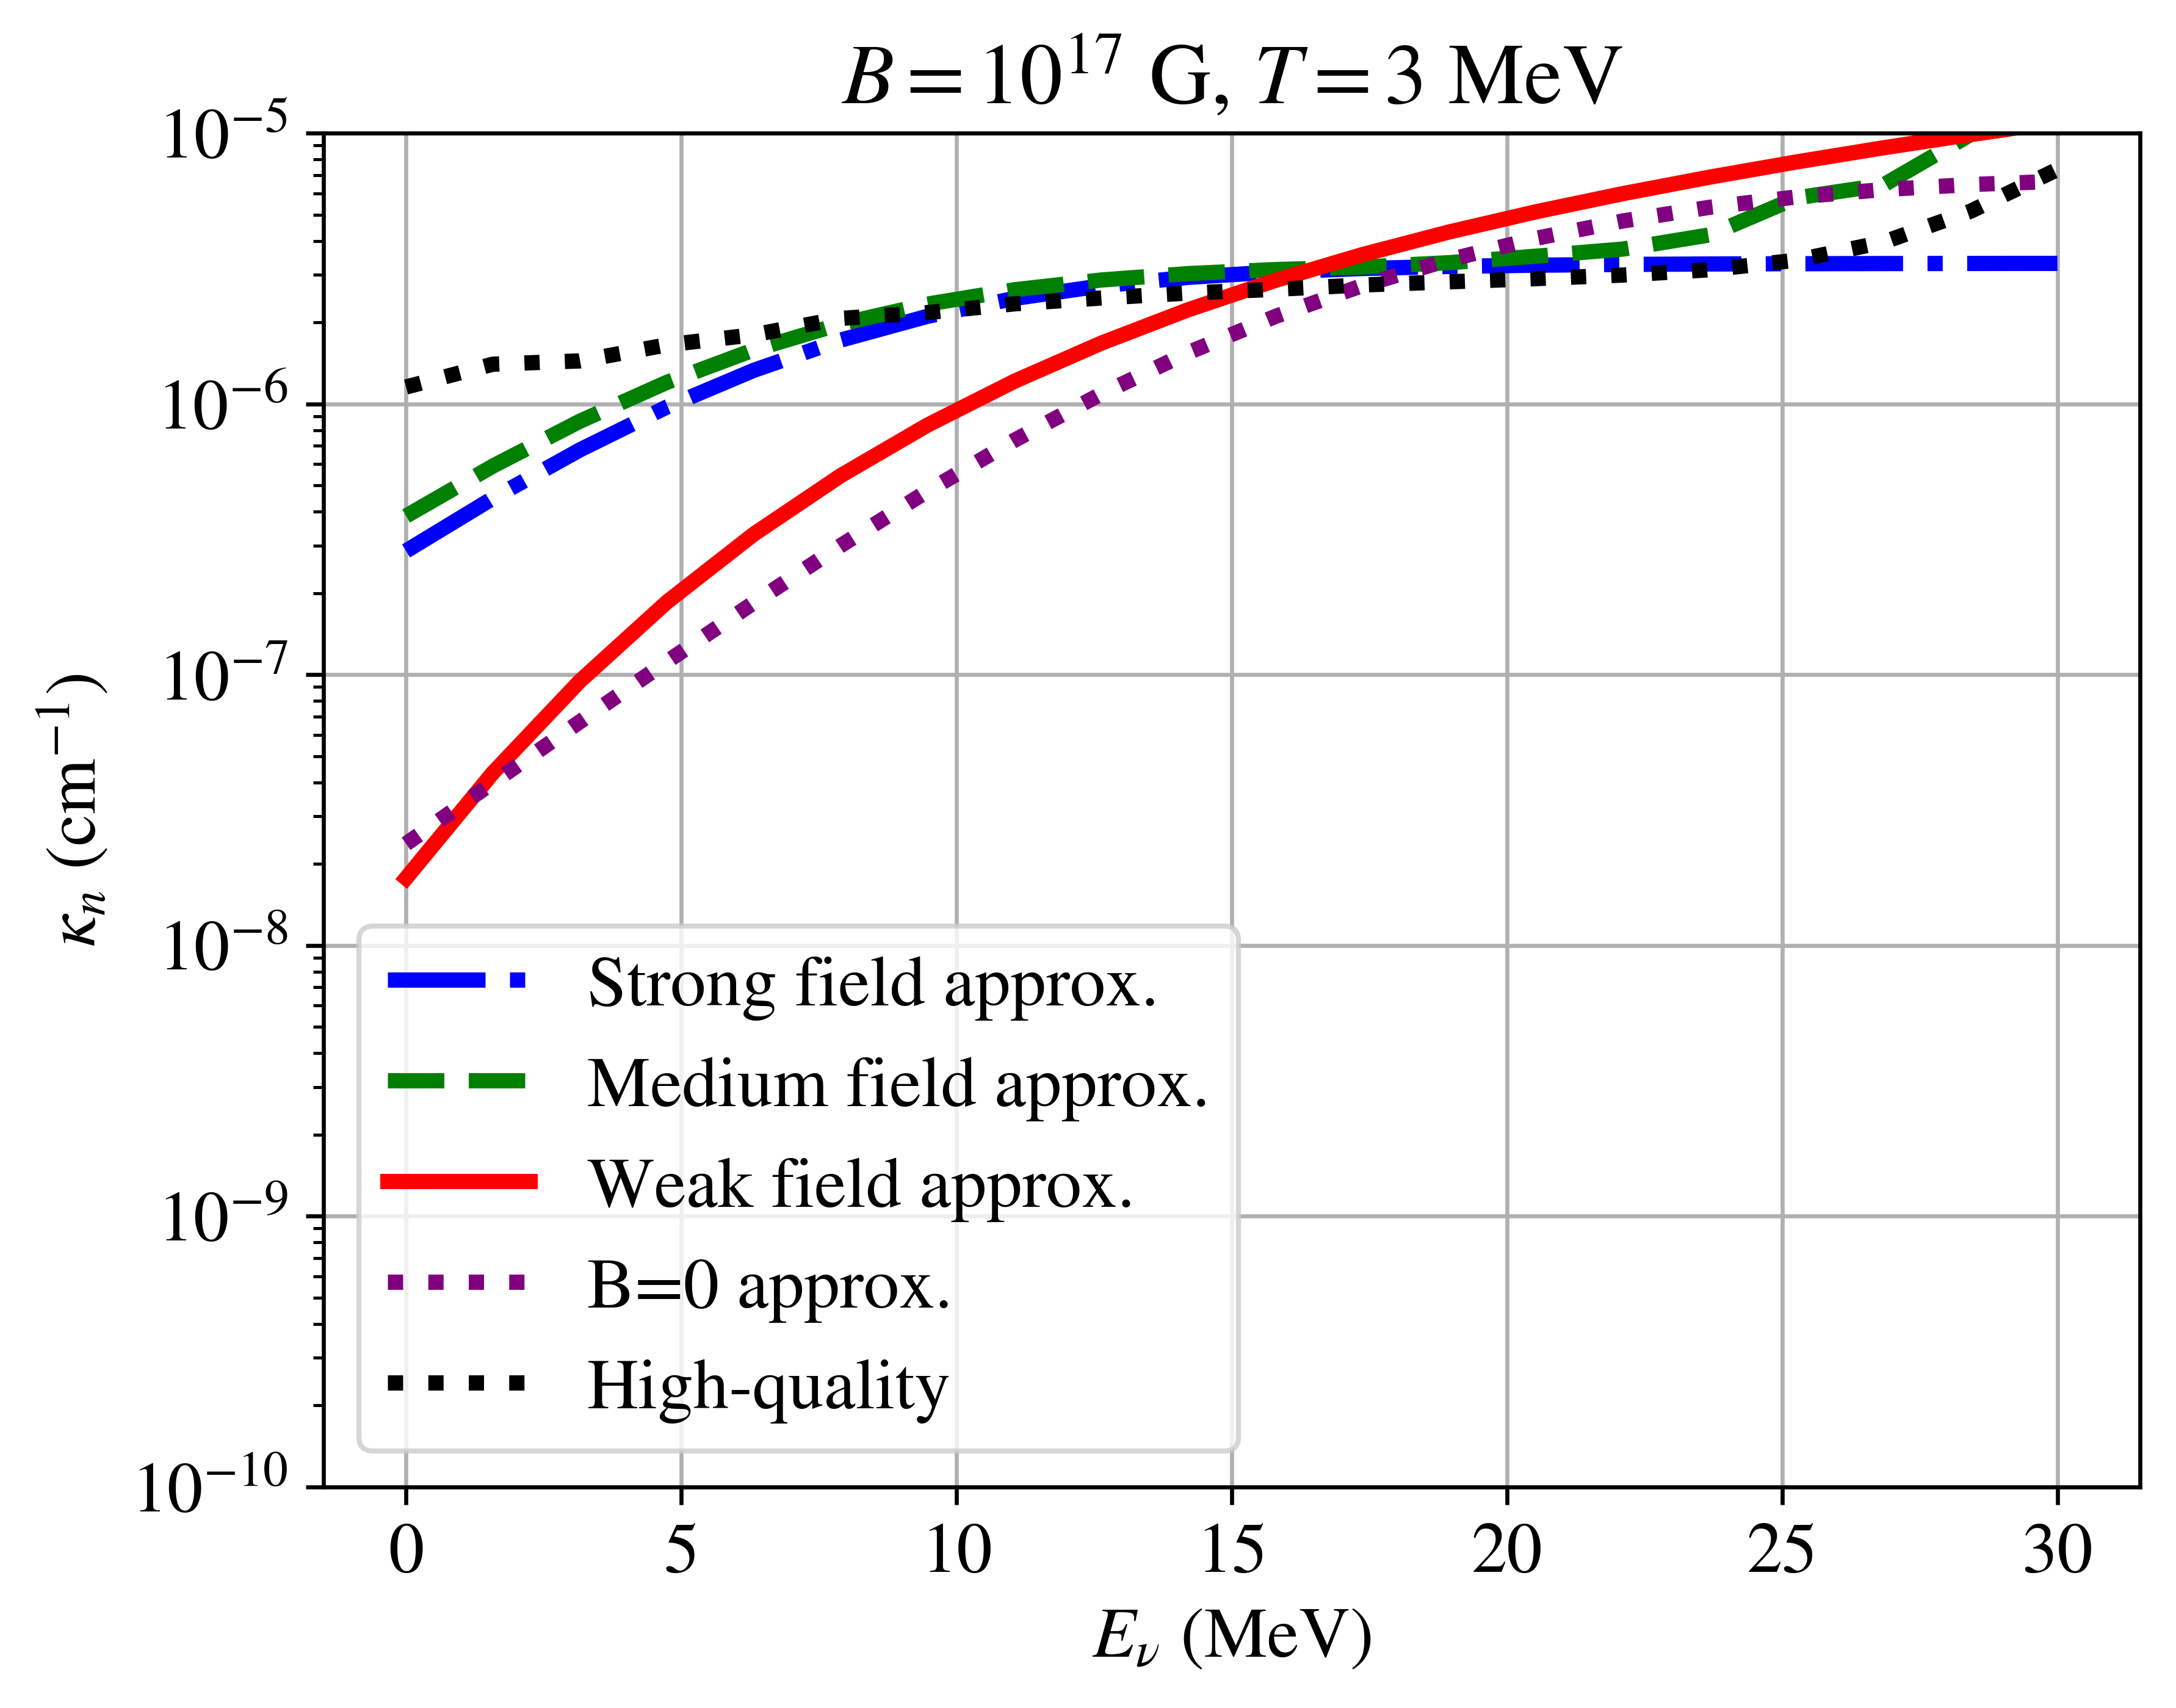

In [14]:
plot(E_nu_space, strong_field_opacities, color="blue", linewidth=3.0, linestyle="-.")
plot(E_nu_space, med_field_opacities, color="green", linewidth=3.0, linestyle="--")
plot(E_nu_space, weak_field_opacities, color="red", linewidth=3.0, linestyle="-")
plot(E_nu_space, zero_field_opacities, color="purple", linewidth=3.0, linestyle=":")
plot(E_nu_space, opacity_n_b1e17_t3mev_lowdensity, color="black", linewidth=3.0, linestyle=":")

grid()

title(L"$B = 10^{17}$ G, $T = 3$ MeV")
legend(["Strong field approx.", "Medium field approx.", "Weak field approx.", "B=0 approx.", "High-quality"])
xlabel(L"$E_\nu$ (MeV)")
ylabel(L"$\kappa_n$ (cm$^{-1}$)")
yscale("log")
ylim([1e-10, 1e-5])

show()
PyPlot.display_figs()


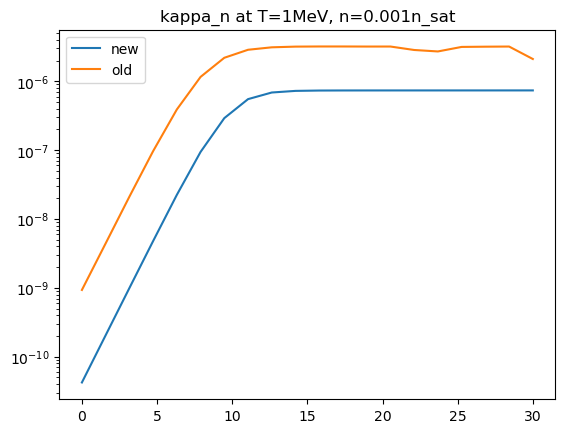

In [13]:
plot(neutrino_energy_points, new_kappa_n_outputs, label="new")
plot(neutrino_energy_points, opacity_n_b1e17_t1mev_lowdensity, label="old")
gca()[:set_yscale]("log")
title("kappa_n at T=1MeV, n=0.001n_sat")
legend()
PyPlot.display_figs()

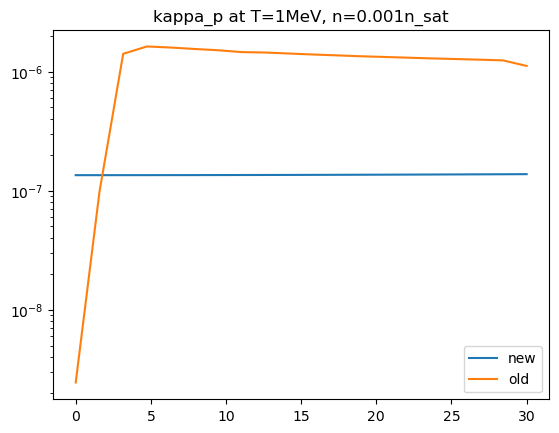

In [15]:
plot(neutrino_energy_points, new_kappa_p_outputs, label="new")
plot(neutrino_energy_points, opacity_p_b1e17_t1mev_lowdensity, label="old")
gca()[:set_yscale]("log")
title("kappa_p at T=1MeV, n=0.001n_sat")
legend()
PyPlot.display_figs()